# **STOCK DATA**

In [4]:
#Import necessary packages
import numpy as np 
import pandas as pd 
from scipy.stats import iqr as sc
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
%matplotlib inline
import math
from scipy import stats
pd.set_option('max_columns', 100)

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, Polygon
import plotly.express as px
import matplotlib.dates as mdates
from plotly import tools
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import numpy as np
import seaborn as sns


#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score





In [5]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [6]:
#pip install Prophet

In [7]:
import yfinance as yf

# CHEVRON DATA
cvx = yf.Ticker('CVX')

hist = cvx.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02 00:00:00-05:00,0.000000,0.355482,0.349865,0.355482,105840,0.0,0.0
1962-01-03 00:00:00-05:00,0.000000,0.356285,0.353075,0.354680,127680,0.0,0.0
1962-01-04 00:00:00-05:00,0.000000,0.354680,0.351470,0.351470,75600,0.0,0.0
1962-01-05 00:00:00-05:00,0.000000,0.352272,0.342643,0.342643,201600,0.0,0.0
1962-01-08 00:00:00-05:00,0.000000,0.344248,0.338631,0.341038,126000,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-24 00:00:00-04:00,172.080002,174.669998,171.610001,173.130005,7007700,0.0,0.0
2022-10-25 00:00:00-04:00,173.059998,175.000000,172.169998,174.929993,7280600,0.0,0.0
2022-10-26 00:00:00-04:00,175.320007,178.479996,175.169998,177.089996,6865300,0.0,0.0


In [8]:
# Candlestick chart of 2020
trace = go.Candlestick(x=hist['2020'].index,
                open=hist['2020'].Open,
                high=hist['2020'].High,
                low=hist['2020'].Low,
                close=hist['2020'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the r

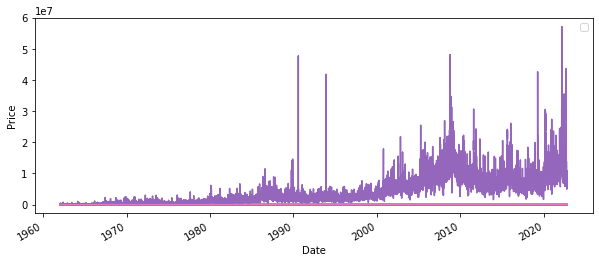

In [9]:
#Historical Price of Chevron 
hist.plot(figsize=(10,4))
plt.ylabel('Price')
plt.legend("");

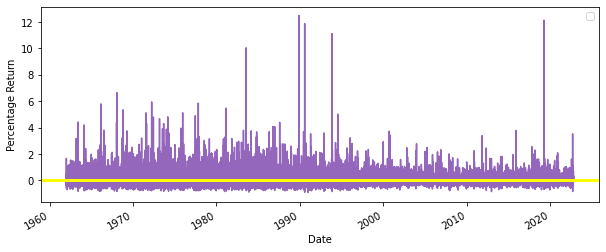

In [10]:
#plot percent change of price Chevron
hist.pct_change().plot(figsize=(10,4))
plt.axhline(0, color='yellow', lw=3)
plt.ylabel('Percentage Return')
plt.legend('', '');

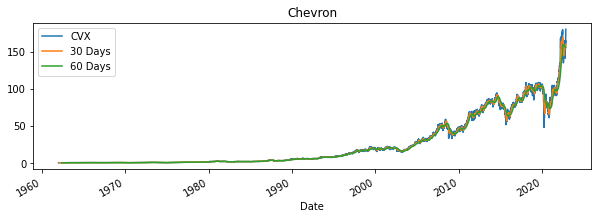

In [11]:
# simple moving averages
sma5 = hist['Close'].rolling(30).mean() #30 days
sma60 = hist['Close'].rolling(100).mean() #100 days
 
hist_sma = pd.DataFrame({'CVX': hist['Close'], '30 Days': sma5, '60 Days': sma60})
hist_sma.plot(figsize=(10, 3), legend=True, title='Chevron');

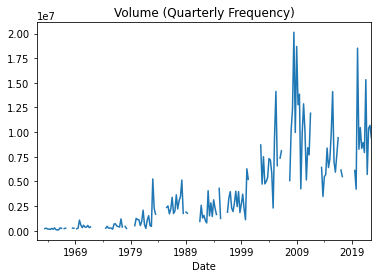

In [12]:
#asfreq method is used to convert a time series to a specified frequency. quarterly frequency:
hist["Volume"].asfreq('Q').plot() 
plt.title('Volume (Quarterly Frequency)')
plt.show()

In [13]:
# Apple DATA
df = yf.Ticker('AAPL')

aapl = df.history(period="max", auto_adjust=True)

aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-24 00:00:00-04:00,147.190002,150.229996,146.000000,149.449997,75981900,0.0,0.0
2022-10-25 00:00:00-04:00,150.089996,152.490005,149.360001,152.339996,74732300,0.0,0.0
2022-10-26 00:00:00-04:00,150.960007,151.990005,148.039993,149.350006,88194300,0.0,0.0


In [14]:
# let's ppek 
aapl.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0.0


In [15]:
# what's up
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10560 entries, 1980-12-12 00:00:00-05:00 to 2022-10-28 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10560 non-null  float64
 1   High          10560 non-null  float64
 2   Low           10560 non-null  float64
 3   Close         10560 non-null  float64
 4   Volume        10560 non-null  int64  
 5   Dividends     10560 non-null  float64
 6   Stock Splits  10560 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 918.0 KB


In [16]:
#summary stats
aapl.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10560.000000,10560.000000,10560.000000,10560.000000,1.056000e+04,10560.000000,10560.00000
mean,15.307961,15.482132,15.138449,15.317098,3.286701e+08,0.000625,0.00161
std,33.972044,34.384650,33.579830,33.999641,3.381682e+08,0.010310,0.08538
min,0.038711,0.038711,0.038276,0.038276,0.000000e+00,0.000000,0.00000
25%,0.236834,0.242537,0.231492,0.236898,1.220688e+08,0.000000,0.00000
50%,0.400227,0.406546,0.392915,0.399300,2.160786e+08,0.000000,0.00000
75%,13.650992,13.781269,13.501365,13.643907,4.076940e+08,0.000000,0.00000
max,181.877375,182.186095,178.381831,181.259918,7.421641e+09,0.230000,7.00000


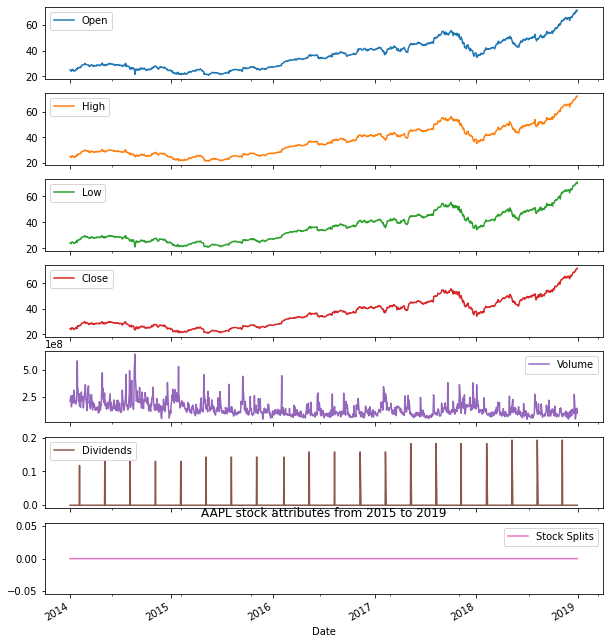

In [17]:
#apple attributes
aapl['2015':'2019'].plot(subplots=True, figsize=(10,12))
plt.title('AAPL stock attributes from 2015 to 2019')
plt.show()

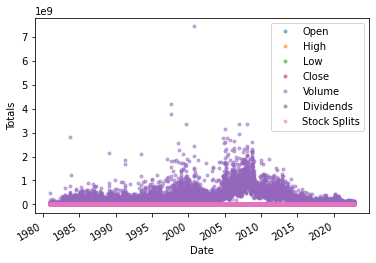

In [18]:
#time series of all variables
axes = aapl.plot(marker='.', alpha=0.5, linestyle='None')
plt.ylabel('Totals');

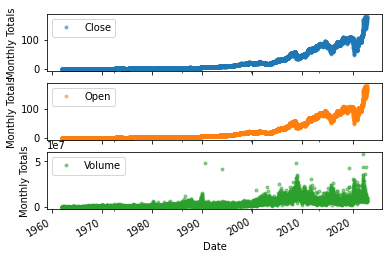

In [19]:
#time series plot of 3 Variables
cols_plot = ['Close', 'Open', 'Volume']

axes = hist[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel('Monthly Totals')

In [20]:
#ohlc chart
trace = go.Ohlc(x=aapl.index,
                open=aapl.Open,
                high=aapl.High,
                low=aapl.Low,
                close=aapl.Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [21]:
# Candlestick chart of march 2008
trace = go.Candlestick(x=aapl['03-2008'].index,
                open=aapl['03-2008'].Open,
                high=aapl['03-2008'].High,
                low=aapl['03-2008'].Low,
                close=aapl['03-2008'].Close)
data = [trace]
iplot(data, filename='simple_candlestick')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the r

In [22]:
# We downsample using 60 day mean
apple60 = aapl.resample('60D').mean()
apple60.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.107086,0.107369,0.106825,0.106825,5.157936e+07,0.0,0.0
1981-02-10 00:00:00-05:00,0.088650,0.088943,0.088357,0.088357,2.549693e+07,0.0,0.0
1981-04-11 00:00:00-05:00,0.101279,0.101660,0.101073,0.101073,3.504872e+07,0.0,0.0
1981-06-10 00:00:00-04:00,0.092790,0.093080,0.092500,0.092500,2.955627e+07,0.0,0.0
1981-08-09 00:00:00-04:00,0.067242,0.067449,0.066911,0.066911,3.398667e+07,0.0,0.0


In [23]:
#upsample from 60 day frequency to daily frequency
appleD = apple60.resample('D').pad()
appleD.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.107086,0.107369,0.106825,0.106825,51579360.0,0.0,0.0
1980-12-13 00:00:00-05:00,0.107086,0.107369,0.106825,0.106825,51579360.0,0.0,0.0
1980-12-14 00:00:00-05:00,0.107086,0.107369,0.106825,0.106825,51579360.0,0.0,0.0
1980-12-15 00:00:00-05:00,0.107086,0.107369,0.106825,0.106825,51579360.0,0.0,0.0
1980-12-16 00:00:00-05:00,0.107086,0.107369,0.106825,0.106825,51579360.0,0.0,0.0


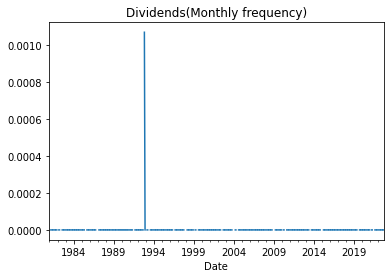

In [24]:
#asfreq method is used to convert a time series to a specified frequency. monthly frequency:
aapl["Dividends"].asfreq('M').plot() 
plt.title('Dividends(Monthly frequency)')
plt.show()

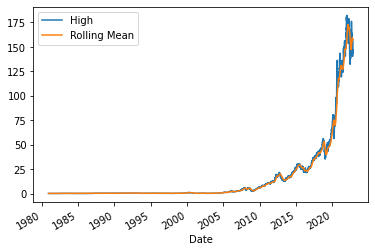

In [25]:
# Rolling window functions
rolling_apple = aapl.High.rolling('90D').mean()
aapl.High.plot()
rolling_apple.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

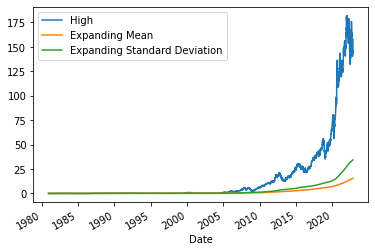

In [26]:
# Expanding window functions
apple_mean = aapl.High.expanding().mean()
apple_std = aapl.High.expanding().std()
aapl.High.plot()
apple_mean.plot()
apple_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

In [27]:
#data frame with date and close data
df = pd.DataFrame()

df['date'] = aapl.index
df['close'] = aapl['Close'].values

# adjust column names for prophet compliance
df.columns = ['dateseries','x']
# convert dates from string to datetime
df.ds = pd.to_datetime(df.dateseries)


df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,dateseries,x
10555,2022-10-24 00:00:00-04:00,149.449997
10556,2022-10-25 00:00:00-04:00,152.339996
10557,2022-10-26 00:00:00-04:00,149.350006
10558,2022-10-27 00:00:00-04:00,144.800003
10559,2022-10-28 00:00:00-04:00,155.740005


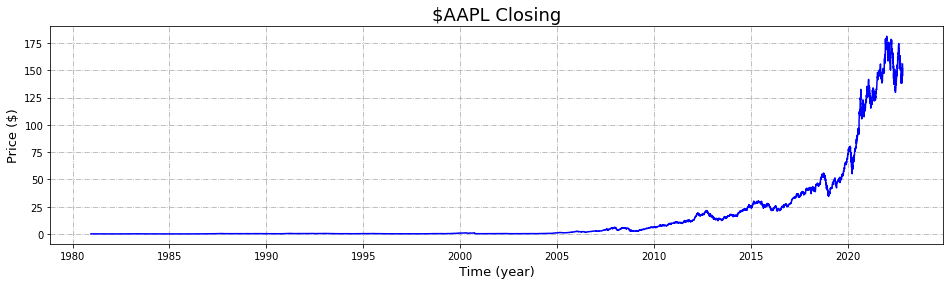

In [28]:
# frame
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

# sketch in data
plt.plot(df.dateseries, df.x, 'b')

# set title & labels
plt.title('$AAPL Closing', fontsize=18)
plt.ylabel('Price ($)', fontsize=13)
plt.xlabel('Time (year)', fontsize=13)

# display graph
plt.show()

In [29]:
#data frame with date and volume data
v = pd.DataFrame()

v['date'] = aapl.index
v['Volume'] = aapl['Volume'].values

# adjust column names for prophet compliance
v.columns = ['dateseries','x']
# convert dates from string to datetime
v.ds = pd.to_datetime(df.dateseries)

v.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,dateseries,x
10555,2022-10-24 00:00:00-04:00,75981900
10556,2022-10-25 00:00:00-04:00,74732300
10557,2022-10-26 00:00:00-04:00,88194300
10558,2022-10-27 00:00:00-04:00,109180200
10559,2022-10-28 00:00:00-04:00,164659100


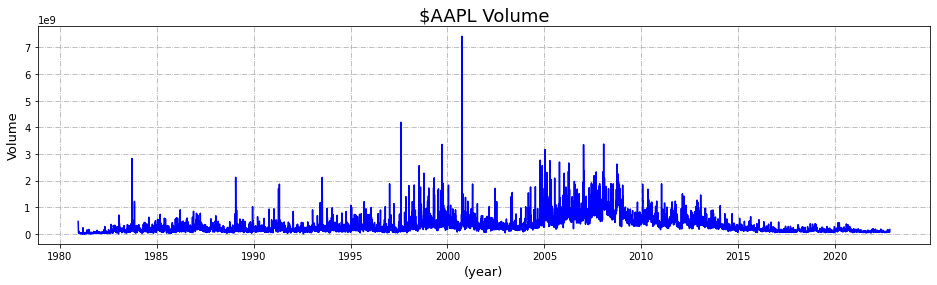

In [30]:
# frame up w/ grid
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

# sketch in data
plt.plot(v.dateseries, v.x, 'b')

# set title & labels
plt.title('$AAPL Volume', fontsize=18)
plt.ylabel('Volume', fontsize=13)
plt.xlabel('(year)', fontsize=13)

# display graph
plt.show()

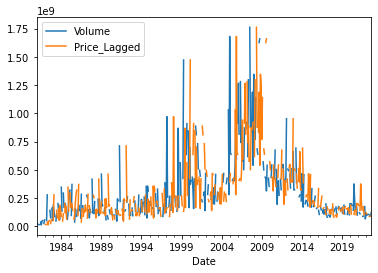

In [31]:
aapl["Volume"].asfreq('M').plot(legend=True)
shifted = aapl["Volume"].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Volume','Price_Lagged'])
plt.show()

In [32]:
fig = px.line(v, x="dateseries", y="x", title='AAPL Volume')
fig.show()

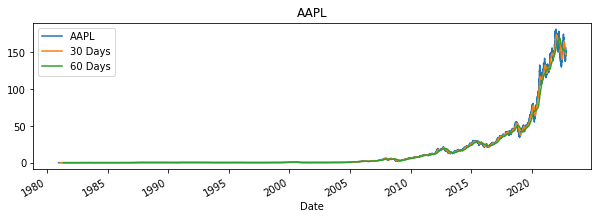

In [33]:
sma5 = aapl['Close'].rolling(30).mean() #30 days
sma60 = aapl['Close'].rolling(100).mean() #100 days
 
AAPL_sma = pd.DataFrame({'AAPL': aapl['Close'], '30 Days': sma5, '60 Days': sma60})
AAPL_sma.plot(figsize=(10, 3), legend=True, title='AAPL');

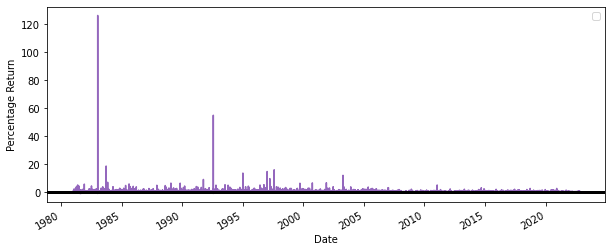

In [34]:
#plot percent change of price
aapl.pct_change().plot(figsize=(10,4))
plt.axhline(0, color='black', lw=3)
plt.ylabel('Percentage Return')
plt.legend('', '');

In [35]:
fig = px.line(aapl, x="Close", y="Open", title='AAPL Price Distribution')
fig.show()

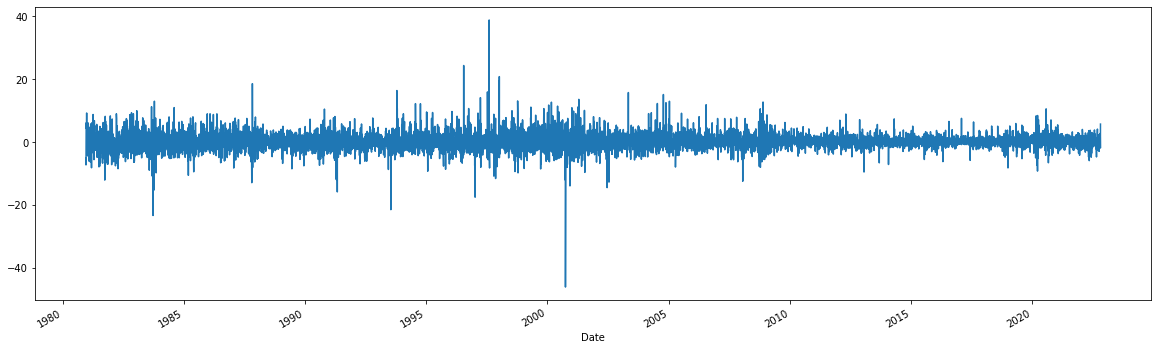

In [36]:
# Another way to calculate returns
aapl.High.pct_change().mul(100).plot(figsize=(20,6)) 

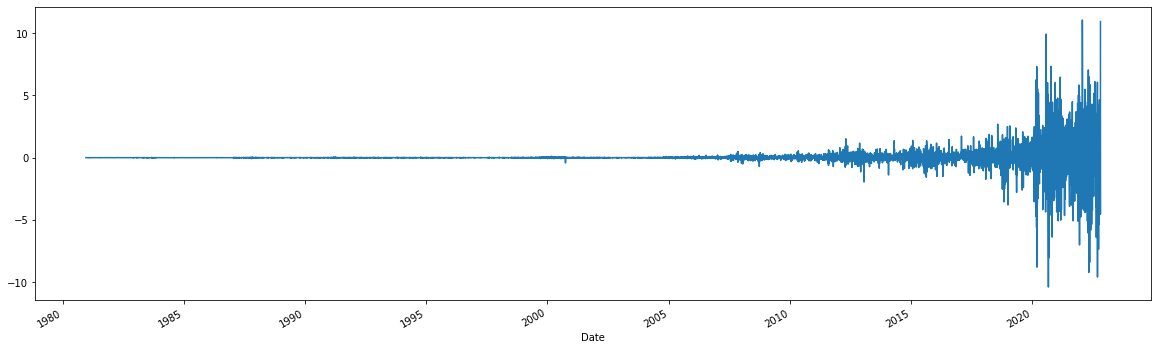

In [37]:
#absolute change of close sucessice rows
aapl.Close.diff().plot(figsize=(20,6))

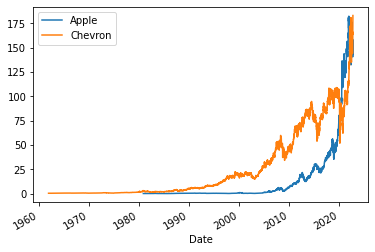

In [38]:
# more Plots
aapl.High.plot()
hist.High.plot()
plt.legend(['Apple','Chevron'])
plt.show()

In [39]:
# OHLC chart of 2022 chevron
trace = go.Ohlc(x=hist['2022'].index,
                open=hist['2022'].Open,
                high=hist['2022'].High,
                low=hist['2022'].Low,
                close=hist['2022'].Close)
data = [trace]
iplot(data, filename='year_ohlc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the r

In [40]:
# OHLC chart of June 2020
trace = go.Ohlc(x=hist['06-2020'].index,
                open=hist['06-2020'].Open,
                high=hist['06-2020'].High,
                low=hist['06-2020'].Low,
                close=hist['06-2020'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the r

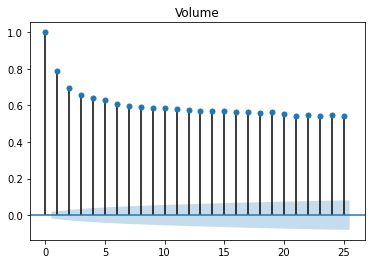

In [41]:
# Autocorrelation of volume
plot_acf(aapl["Volume"],lags=25,title="Volume")
plt.show()

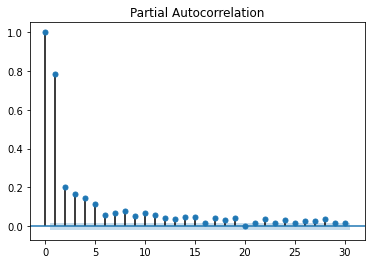

In [42]:
# Partial Autocorrelation of volume
plot_pacf(aapl["Volume"],lags=30)
plt.show()

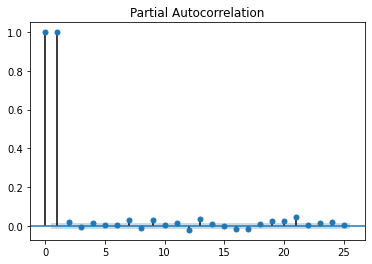

In [43]:
# Partial Autocorrelation of chevron closing price 
plot_pacf(hist["Close"],lags=25)
plt.show()